In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [7]:
len(x_test)

10000

In [8]:
len(x_train)

60000

In [9]:
x_train[1].shape

(28, 28)

In [ ]:
# x_train_flatten=x_train.reshape(len(x_train),28*28)
# x_test_flatten=x_test.reshape(len(x_test),28*28)

In [10]:
x_train[1]
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


MODEL


In [12]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [13]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy',metrics = ['accuracy']
)

In [14]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20


2023-06-07 11:19:03.015393: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 3s 1ms/step - loss: 0.2862 - accuracy: 0.9160
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1167 - accuracy: 0.9642
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0808 - accuracy: 0.9742
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0604 - accuracy: 0.9810
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0454 - accuracy: 0.9848
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0352 - accuracy: 0.9886
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0282 - accuracy: 0.9911
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0230 - accuracy: 0.9925
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0192 - accuracy: 0.9935
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0165 - accurac

In [15]:
accuracy , loss= model.evaluate(x_test,y_test)
print(accuracy)
print (loss)

313/313 [==============================] - 0s 710us/step - loss: 0.1477 - accuracy: 0.9760
0.14771048724651337
0.9760000109672546


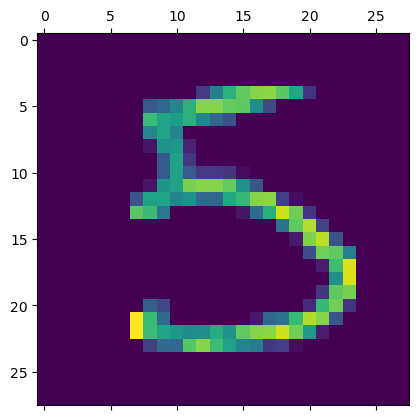

In [27]:
plt.matshow(x_test[15])

In [28]:
model.save('handwrittendigit.model')

INFO:tensorflow:Assets written to: handwrittendigit.model/assets


INFO:tensorflow:Assets written to: handwrittendigit.model/assets


In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [34]:
y_predicted=model.predict(x_test)
y_predicted[15]

313/313 [==============================] - 0s 478us/step


array([4.11187009e-16, 2.72845418e-12, 3.03148671e-16, 4.63576555e-07,
       1.02984034e-13, 9.99999106e-01, 2.01646307e-14, 1.49683204e-13,
       5.12290893e-13, 3.10355915e-07], dtype=float32)

In [35]:
np.argmax(y_predicted[15])

5

In [36]:
y_predicted_lables=[np.argmax(i) for i in y_predicted]

y_predicted_lables[:15]    

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1]

In [37]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_lables)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    0,    0,    1,    0,    3,    0,    2,    2],
       [   0, 1120,    4,    1,    0,    0,    3,    2,    5,    0],
       [   7,    0, 1003,    6,    3,    0,    1,    7,    5,    0],
       [   1,    0,    4,  991,    0,    4,    0,    1,    4,    5],
       [   4,    2,    3,    0,  958,    0,    2,    2,    3,    8],
       [   6,    0,    1,   13,    0,  855,    6,    3,    3,    5],
       [   9,    3,    1,    1,    4,    3,  937,    0,    0,    0],
       [   2,    1,    8,    3,    0,    0,    0, 1006,    1,    7],
       [   6,    1,    3,    5,    1,    5,    0,    4,  944,    5],
       [   0,    3,    1,    8,    8,    5,    1,    4,    5,  974]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

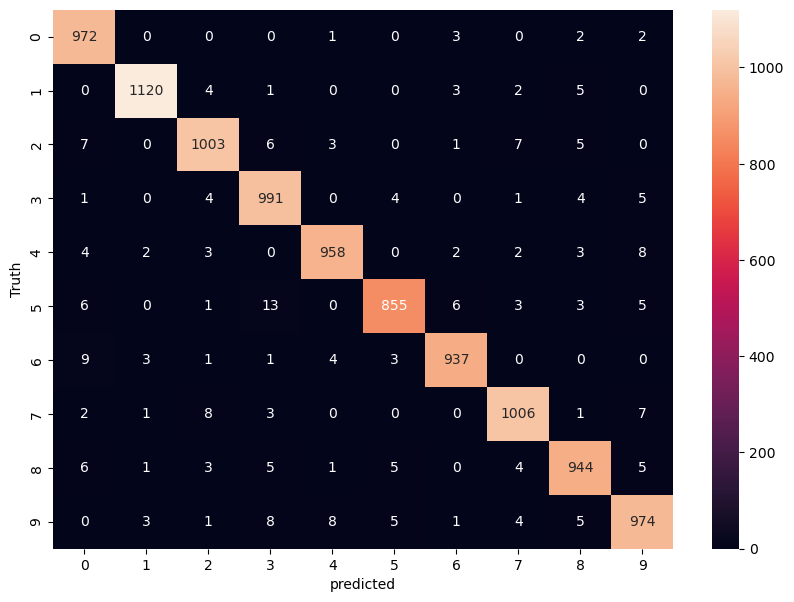

In [38]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')